In [1]:
# Regularisation  (Linear Regression ) 
#Regression means to predict contineous numeric value 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#to laod dataset  of Automobile_data.csv
df=pd.read_csv("Automobile_data.csv")

In [4]:
#to show first 5 records 
df.head(10)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
5,2,?,audi,gas,sedan,fwd,front,66.3,53.1,ohc,136,110,19,25,15250
6,1,158,audi,gas,sedan,fwd,front,71.4,55.7,ohc,136,110,19,25,17710
7,1,?,audi,gas,wagon,fwd,front,71.4,55.7,ohc,136,110,19,25,18920
8,1,158,audi,gas,sedan,fwd,front,71.4,55.9,ohc,131,140,17,20,23875
9,0,?,audi,gas,hatchback,4wd,front,67.9,52.0,ohc,131,160,16,22,12000


In [5]:
#Basic steps of EDA 
#To check null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.info()  #to show all details of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [7]:
#check which type of value in normalized-losses  columns 
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [8]:
#how many ? in normalized-losses  columns
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
168     5
74      5
95      5
85      5
94      5
65      5
102     5
103     5
118     4
122     4
93      4
106     4
148     4
101     3
115     3
137     3
154     3
125     3
83      3
145     2
87      2
81      2
89      2
197     2
188     2
164     2
153     2
110     2
192     2
158     2
113     2
119     2
129     2
108     2
194     2
90      1
78      1
98      1
231     1
142     1
77      1
107     1
121     1
256     1
186     1
Name: normalized-losses, dtype: int64

In [9]:
df.shape  #to show no. of rows and no. of columns means shape[0]=205
#and shape[1]=15 

(205, 15)

In [10]:
#to replace ? of normalized-losses column with null value permanently in df
df["normalized-losses"].replace("?",np.nan,inplace=True) #np.nan : null generate

In [11]:
#again check null values
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [13]:
#To change the datatype of normalized-losses from object to float
df["normalized-losses"]=df["normalized-losses"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB


In [14]:
#check how much null vaLUES in normalized-losses column
df["normalized-losses"].isnull().sum()/df.shape[0]*100

20.0

In [15]:
#Fill normalized-losses with mean of normalized-losses permanently
m=df["normalized-losses"].mean()
df["normalized-losses"].fillna(m,inplace=True)
df.isnull().sum() #again check null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
#check which type of value in horsepower  columns 
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [17]:
#how many ? in horsepower  columns
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
62      6
88      6
101     6
114     6
84      5
102     5
145     5
76      5
97      5
82      5
111     4
123     4
92      4
86      4
207     3
85      3
73      3
182     3
90      3
121     3
152     3
?       2
100     2
56      2
52      2
161     2
112     2
94      2
156     2
184     2
176     2
162     2
155     2
140     1
106     1
78      1
154     1
48      1
72      1
200     1
142     1
175     1
115     1
55      1
262     1
134     1
120     1
143     1
288     1
58      1
60      1
135     1
64      1
Name: horsepower, dtype: int64

In [18]:
#to replace ? of horsepower column with null value permanently in df
df["horsepower"].replace("?",np.nan,inplace=True) #np.nan : null generate

In [19]:
#To change the datatype of horsepower from object to float
df["horsepower"]=df["horsepower"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


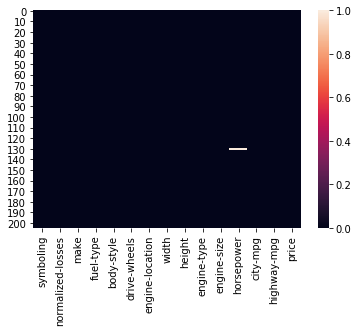

In [20]:
#visualise null values 
sns.heatmap(df.isnull())
plt.show()

In [21]:
#Fill horsepower with mean of horsepower permanently
m=df["horsepower"].mean()
df["horsepower"].fillna(m,inplace=True)
df.isnull().sum() #again check null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

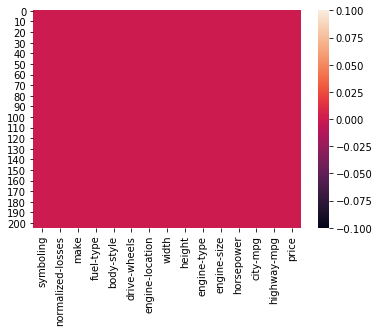

In [22]:
#visualise null values 
sns.heatmap(df.isnull())
plt.show()

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [24]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
#To separate Numerical type and categorical type variables from df
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes(object)

In [26]:
#To convert object type column to numerical type with the help of
#LabelEncoder class
from sklearn.preprocessing import LabelEncoder

In [27]:
df_cat.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [28]:
for col in df_cat:
    #create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [29]:
#check 
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [30]:
#To merge means concatenate of numerical and categorical data set 
#and hold in new dataframe
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [31]:
#work on new dataset df_new
df_new.info()
#Separate Input variables X and Target Variable Y from df_new
X=df_new.drop("price",axis=1) #all columns copy from df_new apart from price 
#in X input varuable from df_new
Y=df_new["price"] #output means target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   engine-size        205 non-null    int64  
 5   horsepower         205 non-null    float64
 6   city-mpg           205 non-null    int64  
 7   highway-mpg        205 non-null    int64  
 8   price              205 non-null    int64  
 9   make               205 non-null    int32  
 10  fuel-type          205 non-null    int32  
 11  body-style         205 non-null    int32  
 12  drive-wheels       205 non-null    int32  
 13  engine-location    205 non-null    int32  
 14  engine-type        205 non-null    int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 19.3 KB


In [32]:
#train_test_split(70%-30%)
from sklearn.model_selection import train_test_split
#Split data into traning(70%) and testing(30%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
#BaseLine Model : use Multiple Linear Regression : multiple input and 
#only one output 
#call class LinearRegression class
from sklearn.linear_model import LinearRegression

In [34]:
#create object of LinearRegression 
lr=LinearRegression()

In [35]:
X.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'make', 'fuel-type',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type'],
      dtype='object')

In [36]:
#We Train the Model  with LinearRegression class : use fit() inbuilt method
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#Check score of training  means training score
#score() inbuilt function of LinearRegression class
#score() is similar work as r2_score (call class from sklearn.metrics import r2_score)
#score or r2_score() both are same ,and formala is also same=(TSS-RSS)/TSS
lr.score(X_train,Y_train) 

0.8504573774895474

In [38]:
#Check score of Testing data same inbuilt method score() or r2_score()

lr.score(X_test,Y_test) ##Y_pred=Mx+b

0.796556678039738

In [39]:
#Here Training Score>Testing Score means 0.85>0.79
#means training's error is less than testing's error
#here Model is overfit means we reduced overfit with the help of regularisation
#There are 2 types of method of Regularisation  :- 
#1. L1 means Lasso Regularisation
#2. L2 means Ridge Regularisation


In [40]:
#1. L1 means Lasso regularisation:- RSS+[lambda *sum(abs(coefficient or slope))]

In [41]:
#check coefficient means slope after training use coef_ inbuilt method
lr.coef_

array([ 4.51384957e+01,  1.53127607e+00,  7.89452171e+02,  3.62663990e+02,
        9.83682875e+01, -1.08169245e+01,  3.08017854e+02, -4.17024371e+02,
       -2.00099087e+02, -6.22650015e+02, -1.70235175e+02,  1.86860719e+03,
        1.64133620e+04,  2.83174279e+02])

In [42]:
X.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'make', 'fuel-type',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type'],
      dtype='object')

In [43]:
#Lecture  14-mar-2021 
#LAsso regularisation means L1 use  means add extertal error 
#RSS+[lambda *sum(abs(coefficient or slope))]

In [44]:
#call class Lasso inbuilt class
from sklearn.linear_model import Lasso 

In [45]:
#create the object of Lasso class and pass the argument means value of 
#alpha or lambda(hypermeter) range : 200-1000
#we pass 1000 of value of lambda
l1=Lasso(1000) #here lambda=1000

In [46]:
#use fit() , inbuilt method of Lasso Regularisation
l1.fit(X_train,Y_train) ##RSS+[lambda *sum(abs(coefficient or slope))] logic
#pass 70% training data(Inputs and output)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#Check out the coefficient or slope  after apply lasso use coef_ inbuilt method
#of lasso
l1.coef_

array([   0.        ,    3.96310671,    0.        ,  276.93279232,
        135.34169218,   16.00129073,   -0.        , -113.03311963,
       -126.40695244,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ])

In [48]:
X.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'make', 'fuel-type',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type'],
      dtype='object')

In [49]:
#In lasso , if no imp features to predict the output then slope means 
#coefficient =0 but if imp features to predict the output then slope 
#means coefficent is increased .
#means Lasso is a very important for Fetaure selection technique means it 
#is used to select imp features from dataset whose imp to predict the output

In [50]:
#Ridge Regularisation means L2 we call class Ridge inbuilt class
#call class Ridge inbuilt class
from sklearn.linear_model import Ridge 

In [51]:
#create the object of Ridge class
l2=Ridge(10) #in Ridge regularisation , value of lambda means alpha =0-50 
#In ridge , we add external error on training the mode (means training time)
#RSS+lambda*sum(square(all coefficient))

In [52]:
#use fit() , inbuilt method of Ridge Regularisation
l2.fit(X_train,Y_train) ##RSS+[lambda *sum(square(coefficient or slope))] logic
#pass 70% training data(Inputs and output)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [53]:
X.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'make', 'fuel-type',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type'],
      dtype='object')

In [54]:
#check coefficeint means slope after apply ridge reg. 
l2.coef_

array([ 2.08658930e+02, -5.60173023e-01,  3.64420144e+02,  5.72916414e+02,
        1.04441215e+02,  2.21332730e+01,  2.11271281e+02, -2.72864381e+02,
       -1.86340249e+02, -9.06610516e+02, -6.30655861e+02,  1.56860422e+03,
        2.57047785e+03,  5.15948757e+02])

In [55]:
''' In Ridge regularisation , reduced the slope of less imp features and 
increase the slope of most imp features '''
#y_pred=m1x1+m2x2+.....

' In Ridge regularisation , reduced the slope of less imp features and \nincrease the slope of most imp features '

In [56]:
#How to select the right value of lambda or alpha (Hyper-parameter )
#in Lasso Regularisation 
for i in range(200,1001,50): #start=200 stop=1001-1=1000 step=+50
    #create object of Lasso object 
    l1=Lasso(i) #Rss+lambda*sum(abs(all coef))
    #train the model with Lasso use fit() inbuilt method of Lasso
    l1.fit(X_train,Y_train)
    print("Value of Lambda : " , i, "Testing Score : ",l1.score(X_test,Y_test))

Value of Lambda :  200 Testing Score :  0.813920135802378
Value of Lambda :  250 Testing Score :  0.812421909078023
Value of Lambda :  300 Testing Score :  0.8085057299003378
Value of Lambda :  350 Testing Score :  0.8036053753129062
Value of Lambda :  400 Testing Score :  0.7977229768452245
Value of Lambda :  450 Testing Score :  0.7950465607641612
Value of Lambda :  500 Testing Score :  0.7946028204251037
Value of Lambda :  550 Testing Score :  0.7942485978551437
Value of Lambda :  600 Testing Score :  0.7938656404830355
Value of Lambda :  650 Testing Score :  0.7934536226456452
Value of Lambda :  700 Testing Score :  0.7930208714948073
Value of Lambda :  750 Testing Score :  0.792563723506569
Value of Lambda :  800 Testing Score :  0.7920812896372945
Value of Lambda :  850 Testing Score :  0.7915726589657284
Value of Lambda :  900 Testing Score :  0.7910703319438238
Value of Lambda :  950 Testing Score :  0.7910205756985366
Value of Lambda :  1000 Testing Score :  0.7909522259248712

In [57]:
#score =0.81 and right value of lambda=200

In [58]:
#How to select the right value of lambda or alpha (Hyper-parameter )
#in Ridge Regularisation 
for i in range(0,51,1): #start=0 stop=511-1=50 step=+10
    #create object of Ridge object 
    l2=Ridge(i) #Rss+lambda*sum(square(all coef))
    #train the model with Ridge use fit() inbuilt method of Ridge
    l2.fit(X_train,Y_train)
    print("Value of Lambda : " , i, "Testing Score : ",l2.score(X_test,Y_test))

Value of Lambda :  0 Testing Score :  0.7965566780397382
Value of Lambda :  1 Testing Score :  0.8074518758147277
Value of Lambda :  2 Testing Score :  0.8110292248150512
Value of Lambda :  3 Testing Score :  0.8126933383890032
Value of Lambda :  4 Testing Score :  0.8136148645029302
Value of Lambda :  5 Testing Score :  0.8141745853539419
Value of Lambda :  6 Testing Score :  0.8145301242133359
Value of Lambda :  7 Testing Score :  0.8147582608502814
Value of Lambda :  8 Testing Score :  0.8149010602831952
Value of Lambda :  9 Testing Score :  0.814983694925305
Value of Lambda :  10 Testing Score :  0.8150222867376524
Value of Lambda :  11 Testing Score :  0.8150277245431793
Value of Lambda :  12 Testing Score :  0.8150076788279419
Value of Lambda :  13 Testing Score :  0.8149677381788262
Value of Lambda :  14 Testing Score :  0.8149120868051175
Value of Lambda :  15 Testing Score :  0.8148439278252517
Value of Lambda :  16 Testing Score :  0.814765758494739
Value of Lambda :  17 Test

In [59]:
#in Ridge right value of lambda : Value of Lambda :  2 & Testing Score :  0.81

In [60]:
#in ridge we take lambda=2  &  score=0.81 
#in lasso we take lambda=200  &  score=0.81 
#but we select any one method lasso or ridge regularisation  so we will help
#cross validation .

In [61]:
#apply cross validation we have inbuilt class for cross validation
#call this class
from sklearn.model_selection import cross_val_score
#apply cross validation we have inbuilt class for cross validation
#call this class
from sklearn.model_selection import cross_val_score

In [62]:
#create object of cross_val_score class and pass following parameter 
#we do cross validation with Lasso
l1=Lasso(200) #First create object of lass regularisation and pass the right 
#value of lambda=200
l1_cross=cross_val_score(l1,X,Y,cv=4) 
'''Here first parameter : object of Lasso regularisation
        second parameter : Input X and 
        Third parameter  :output Y 
        Fourth parameter : cv=4 means partof dataset=4 means 4 part of data'''

'Here first parameter : object of Lasso regularisation\n        second parameter : Input X and \n        Third parameter  :output Y \n        Fourth parameter : cv=4 means partof dataset=4 means 4 part of data'

In [63]:
l1_cross #show the score of each part

array([0.76560829, 0.81872367, 0.43344753, 0.448364  ])

In [64]:
#to find the average means mean of score of each part(each iteration)
np.mean(l1_cross)

0.6165358705430694

In [65]:
#apply cross validation with ridge regularisation 
#create object of cross_val_score class and pass following parameter 
#we do cross validation with Ridge
l2=Ridge(2) #First create object of lass regularisation and pass the right 
#value of lambda=200
l2_cross=cross_val_score(l2,X,Y,cv=4) 
'''Here first parameter : object of Ridge regularisation
        second parameter : Input X and 
        Third parameter  :output Y 
        Fourth parameter : cv=4 means partof dataset=4 means 4 part of data'''

'Here first parameter : object of Ridge regularisation\n        second parameter : Input X and \n        Third parameter  :output Y \n        Fourth parameter : cv=4 means partof dataset=4 means 4 part of data'

In [66]:
#show the score of each part
l2_cross

array([0.71176474, 0.86474228, 0.37640664, 0.47020196])

In [67]:
#to find the average means mean of score of each part(each iteration)
np.mean(l2_cross)

0.6057789059244738

In [68]:
#average of score of each part of Lasso is greater than Ridge regularisation
#means Lasso regularisation is best for in this dataset
#means score=.81